# Introduction to Machine Learning in Python

## What is Machine Learning?

*Based on <a href="github.com/amueller/scipy_2015_sklearn_tutorial">material by Gael Varoquaux, Olivier Grisel, Jake VanderPlas, Kyle Kastner, Andreas Mueller</a>*

Machine learning is the process to automatically extract knowledge from data, usually with the goal of making predictions on new, unseen data. A classical example is a spam filter, for which the user keeps labeling incoming mails as either spam or not spam. A machine learning algorithm then "learns" what distinguishes spam from normal emails, and can predict for new emails whether they are spam or not.

Central to machine learning is the concept of **making decision automatically** from data, **without the user specifying explicit rules** how this decision should be made.

For the case of emails, the user doesn't provide a list of words or characteristics that make an email spam. Instead, the user provides examples of spam and non-spam emails.

The second central concept is **generalization**. The goal of a machine learning algorithm is to predict on new, previously unseen data. We are not interested in marking an email as spam or not, that the human already labeled. Instead, we want to make the users life easier by making an automatic decision for new incoming mail.

<img src="figures/supervised_workflow.svg" width="100%">

The data is presented to the algorithm usually as an array of numbers. Each data point (also known as sample) that we want to either learn from or make a decision on is represented as a list of numbers, called features, that reflect properties of this point.

There are two kinds of machine learning we will talk about today: Supervised learning and unsupervised learning

### Supervised Learning: Classification and regression

In **Supervised Learning**, we have a dataset consisting of both input features and a desired output, such as in the spam / no-spam example.
The task is to construct a model (or program) which is able to predict the desired output of an unseen object
given the set of features.

Some more complicated examples are:

- given a multicolor image of an object through a telescope, determine
  whether that object is a star, a quasar, or a galaxy.
- given a photograph of a person, identify the person in the photo.
- given a list of movies a person has watched and their personal rating
  of the movie, recommend a list of movies they would like.
- given a persons age, education and position, infer their salary

What these tasks have in common is that there is one or more unknown
quantities associated with the object which needs to be determined from other
observed quantities.

Supervised learning is further broken down into two categories, **classification** and **regression**.
In classification, the label is discrete, such as "spam" or "no spam". In other words, it provides a clear-cut distinction between categories. In regression, the label is continuous, that is a float output. For example,
in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a
classification problem: the label is from three distinct categories. On the other hand, we might
wish to estimate the age of an object based on such observations: this would be a regression problem,
because the label (age) is a continuous quantity.

In supervised learning, there is always a distinction between a **training set** for which the desired outcome is given, and a **test set** for which the desired outcome needs to be inferred.  More about that later.

### Unsupervised Learning

In **Unsupervised Learning** there is no desired output associated with the data.
Instead, we are interested in extracting some form of knowledge or model from the given data.
In a sense, you can think of unsupervised learning as a means of discovering labels from the data itself.
Unsupervised learning is often harder to understand and to evaluate.

Unsupervised learning comprises tasks such as *dimensionality reduction*, *clustering*, and
*density estimation*, e.g.

## sklearn estimator API

Scikit-learn strives to have a uniform interface across all objects. Given a scikit-learn *estimator* named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, ``fit`` takes only a single argument,
    the data `X` (e.g. `model.fit(X)`).

- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : An indication of how well the model fits the training data.  Scores are between 0 and 1, with a larger score indicating a better fit.

## Data in scikit-learn

Data in scikit-learn, with very few exceptions, is assumed to be stored as a
**two-dimensional array**, of size `[n_samples, n_features]`. Many algorithms also accept ``scipy.sparse`` matrices of the same shape.

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

Each sample (data point) is a row in the data array, and each feature is a column.

## Training and Testing Data

To evaluate how well our supervised models generalize, we can split our data into a training and a test set:

<img src="figures/train_test_split.svg" width="100%">


Thinking about how machine learning is normally performed, the idea of a train/test split makes sense. Real world systems train on the data they have, and as other data comes in (from customers, sensors, or other sources) the classifier that was trained must predict on fundamentally *new* data. We can simulate this during training using a train/test split - the test data is a simulation of "future data" which will come into the system during production. 


Note that some datasets are sorted according to the label, so you want to *shuffle* your data before splitting!

In [1]:
from sklearn.cross_validation import train_test_split

## Feature extraction

Here we will talk about an important piece of machine learning: the extraction of
quantitative features from data.  By the end of this section you will

- Know how features are extracted from real-world data.
- See an example of extracting numerical features from textual data

In addition, we will go over several basic tools within scikit-learn which can be used to accomplish the above tasks.

### Numerical vs Categorical

What if you have categorical features?  For example, imagine there is data on the color of each
iris:

    color in [red, blue, purple]

You might be tempted to assign numbers to these features, i.e. *red=1, blue=2, purple=3*
but in general **this is a bad idea**.  Estimators tend to operate under the assumption that
numerical features lie on some continuous scale, so, for example, 1 and 2 are more alike
than 1 and 3, and this is often not the case for categorical features.

A better strategy is to give each category its own dimension.  
The enriched iris feature set would hence be in this case:

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm
- color=purple (1.0 or 0.0)
- color=blue (1.0 or 0.0)
- color=red (1.0 or 0.0)

Note that using many of these categorical features may result in data which is better
represented as a **sparse matrix**, as we'll see with the text classification example
below.

#### Using the DictVectorizer to encode categorical features

When the source data is encoded has a list of dicts where the values are either strings names for categories or numerical values, you can use the `DictVectorizer` class to compute the boolean expansion of the categorical features while leaving the numerical features unimpacted:

In [2]:
measurements = [
    {'city': 'Dubai', 'temperature': 33.},
    {'city': 'London', 'temperature': 12.},
    {'city': 'San Francisco', 'temperature': 18.},
]

In [3]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()

In [4]:
tf_measurements = vec.fit_transform(measurements)
tf_measurements

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [5]:
tf_measurements.toarray()

array([[  1.,   0.,   0.,  33.],
       [  0.,   1.,   0.,  12.],
       [  0.,   0.,   1.,  18.]])

In [6]:
vec.get_feature_names()

['city=Dubai', 'city=London', 'city=San Francisco', 'temperature']

## Training and evaluating a classifier: The Titanic

As an example of how to work with both categorical and numerical data, we will perform survival predicition for the passengers of the HMS Titanic.

We will use a version of the Titanic (titanic3.xls) dataset from Thomas Cason, as retrieved from [Frank Harrell's webpage](http://lib.stat.cmu.edu/S/Harrell/data/descriptions/titanic.html). We converted the .xls to .csv, but the data is otherwise unchanged.

In [7]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv('data/titanic3.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


The site [linked here](http://lib.stat.cmu.edu/S/Harrell/data/descriptions/titanic3info.txt) gives a broad description of the keys and what they mean - we show it here for completeness

```
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
survival        Survival
                (0 = No; 1 = Yes)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
boat            Lifeboat
body            Body Identification Number
home.dest       Home/Destination
```

In general, it looks like `name`, `sex`, `cabin`, `embarked`, `boat`, `body`, and `homedest` may be candidates for categorical features, while the rest appear to be numerical features.

Hrm, looks like some columns contain NaN's.  We could either throw away those records, or we could remove those columns.  Since badly measured features are probably not going to help us much, let's just drop those columns.

In [9]:
titanic = df.dropna(axis=1, thresh=1000)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


And now drop rows with NaNs left:

In [10]:
print(len(titanic))
titanic = titanic.dropna()
print(len(titanic))

1309
1043


### How generalizable are these features?

In [11]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked'],
      dtype='object')

All except for 'name' & 'ticket' (ticket nr), make some sense (we'd be able to fit a model that predicts *very* well if we go on name, but it won't be able to generalize at all!).  So let's drop that one:

In [12]:
titanic = titanic.drop(['name', 'ticket'], axis=1)

Let's also grab our labels:

In [13]:
labels = titanic.pop('survived')
labels

0       1
1       1
2       0
3       0
4       0
5       1
6       1
7       0
8       1
9       0
10      0
11      1
12      1
13      1
14      1
16      0
17      1
18      1
19      0
20      1
21      1
22      1
23      1
24      1
25      0
26      1
27      1
28      1
29      1
30      0
       ..
1269    0
1270    0
1271    0
1272    0
1273    0
1274    0
1275    0
1276    0
1277    1
1278    0
1279    0
1280    0
1281    0
1285    0
1286    1
1287    0
1288    0
1289    0
1290    1
1294    0
1295    0
1296    0
1298    0
1299    0
1300    1
1301    0
1304    0
1306    0
1307    0
1308    0
Name: survived, dtype: int64

OK, got the data and the labels.  But as we mentioned, there are categorical variables, and we'll have to encode them.  We could manually encode each individual column:

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit_transform(titanic['sex'])

array([0, 1, 0, ..., 1, 1, 1])

In [15]:
encoder.classes_

array(['female', 'male'], dtype=object)

Or, we can make use of ``DictVectorizer``, shown before:

In [16]:
data = titanic.to_dict(orient='records')
data

[{'age': 29.0,
  'embarked': 'S',
  'fare': 211.3375,
  'parch': 0,
  'pclass': 1,
  'sex': 'female',
  'sibsp': 0},
 {'age': 0.9167,
  'embarked': 'S',
  'fare': 151.55,
  'parch': 2,
  'pclass': 1,
  'sex': 'male',
  'sibsp': 1},
 {'age': 2.0,
  'embarked': 'S',
  'fare': 151.55,
  'parch': 2,
  'pclass': 1,
  'sex': 'female',
  'sibsp': 1},
 {'age': 30.0,
  'embarked': 'S',
  'fare': 151.55,
  'parch': 2,
  'pclass': 1,
  'sex': 'male',
  'sibsp': 1},
 {'age': 25.0,
  'embarked': 'S',
  'fare': 151.55,
  'parch': 2,
  'pclass': 1,
  'sex': 'female',
  'sibsp': 1},
 {'age': 48.0,
  'embarked': 'S',
  'fare': 26.55,
  'parch': 0,
  'pclass': 1,
  'sex': 'male',
  'sibsp': 0},
 {'age': 63.0,
  'embarked': 'S',
  'fare': 77.95829999999998,
  'parch': 0,
  'pclass': 1,
  'sex': 'female',
  'sibsp': 1},
 {'age': 39.0,
  'embarked': 'S',
  'fare': 0.0,
  'parch': 0,
  'pclass': 1,
  'sex': 'male',
  'sibsp': 0},
 {'age': 53.0,
  'embarked': 'S',
  'fare': 51.4792,
  'parch': 0,
  'pclass':

In [17]:
vec = DictVectorizer()
data_vectorized = vec.fit_transform(data)

In [18]:
data_vectorized

<1043x10 sparse matrix of type '<class 'numpy.float64'>'
	with 5846 stored elements in Compressed Sparse Row format>

In [19]:
data_vectorized.shape

(1043, 10)

In [20]:
vec.feature_names_

['age',
 'embarked=C',
 'embarked=Q',
 'embarked=S',
 'fare',
 'parch',
 'pclass',
 'sex=female',
 'sex=male',
 'sibsp']

Notice how "embarked" and "sex" got unpacked.

Now, we need to split the data into training and testing sets:

In [21]:
from sklearn.cross_validation import train_test_split

In [22]:
data_train, data_test, labels_train, labels_test = train_test_split(data_vectorized, labels, test_size=0.25,
                                                                    random_state=42)
data_train.shape[0], data_test.shape[0]

(782, 261)

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

clf = DummyClassifier('most_frequent')
clf.fit(data_train, labels_train)
pred_labels = clf.predict(data_test)

print("Prediction accuracy: %f" % accuracy_score(pred_labels, labels_test))

Prediction accuracy: 0.605364


The Dummy Classifier gives us a (fairly bad) baseline.  Let's try logistic regression instead.

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
clf = LogisticRegression()
clf.fit(data_train, labels_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [26]:
clf.score(data_test, labels_test)

0.77011494252873558

Much better!  And which features were informative **during training**?

In [27]:
coef_weights = zip(vec.feature_names_, clf.coef_[0])
list(reversed(sorted(coef_weights, key=lambda x: abs(x[1]))))

[('sex=female', 2.1404503532280508),
 ('embarked=C', 1.1425525728040324),
 ('pclass', -0.98317762626086669),
 ('embarked=S', 0.58345674078628573),
 ('sex=male', -0.50037879751993553),
 ('sibsp', -0.46625394829029432),
 ('parch', 0.14216622754408406),
 ('embarked=Q', -0.085937757882188395),
 ('age', -0.033233561255206524),
 ('fare', 0.00078697442177276089)]

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
        
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(n_top_features * 2), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 2 * n_top_features + 1), feature_names[interesting_coefficients], rotation=60, ha="right");

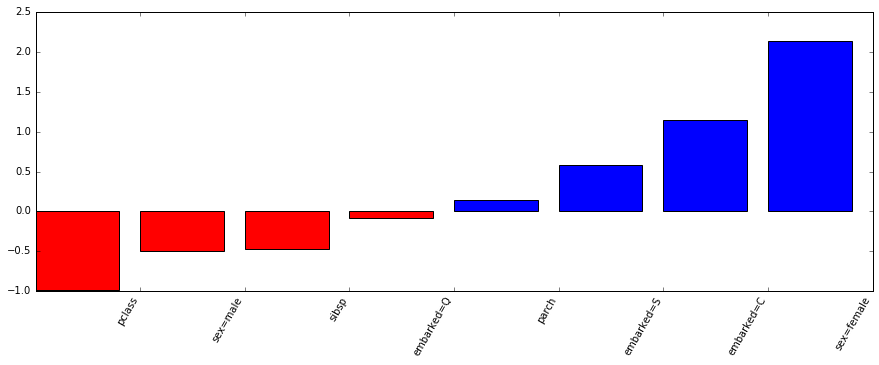

In [29]:
visualize_coefficients(clf, vec.feature_names_, n_top_features=4)

In [47]:
from sklearn.ensemble import RandomForestClassifier

def rf_eval(data_train, labels_train, data_test, labels_test, random_state=2):
    rf = RandomForestClassifier(random_state=random_state)
    rf.fit(data_train, labels_train)
    return rf, rf.score(data_test, labels_test)

In [48]:
rf, score = rf_eval(data_train, labels_train, data_test, labels_test)
rf, score

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=2, verbose=0, warm_start=False),
 0.77394636015325668)

Feature ranking:
0. feature fare (0.259816)
1. feature age (0.257916)
2. feature sex=male (0.206330)
3. feature pclass (0.090775)
4. feature sex=female (0.074214)
5. feature sibsp (0.040782)
6. feature parch (0.037979)
7. feature embarked=S (0.014696)
8. feature embarked=C (0.011794)
9. feature embarked=Q (0.005698)


/home/stefan/envs/py3/lib/python3.4/site-packages/matplotlib/collections.py:620: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


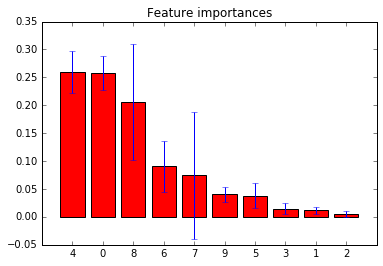

In [49]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
N = len(rf.feature_importances_)

# Print the feature ranking
print("Feature ranking:")

for f in range(N):
    print("%d. feature %s (%f)" % (f, vec.feature_names_[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(N), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(N), indices)
plt.xlim([-1, N])
plt.show()

Take these with a hint of salt.  Classification without "age" performs just as well!

In [50]:
from sklearn.ensemble import RandomForestClassifier

selected = titanic.copy()
selected = selected.drop(['embarked'], axis=1)
selected['sex'] = selected['sex'] == 'female'

selected_data_train, selected_data_test, selected_labels_train, selected_labels_test = \
  train_test_split(selected, labels, test_size=0.25, random_state=42)

#rf2 = RandomForestClassifier(random_state=2)
#rf2.fit(selected_data_train, selected_labels_train)
#rf2.score(selected_data_test, selected_labels_test)
rf, score = rf_eval(selected_data_train, selected_labels_train, selected_data_test, selected_labels_test)

score

0.78927203065134099

Also, don't pay too close attention to these numbers.  These are *random forests* after all, they can vary a lot depending on the initial seed:

In [61]:
scores = []

for seed in range(0, 42):
    rf, score = rf_eval(selected_data_train, selected_labels_train, selected_data_test, selected_labels_test,
                        random_state=seed)
    scores.append(score * 100)

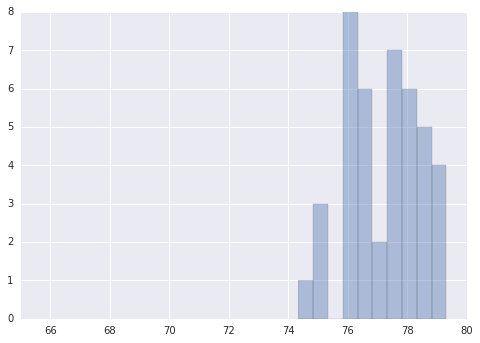

In [69]:
import seaborn as sns
g = sns.distplot(scores, kde=False, bins=10)
g.set(xlim=(65, 80));